In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import os

In [ ]:
# d读数据
df = pd.read_csv('./wave3ndata.csv') 
print("数据形状:", df.shape)



In [ ]:
df.head()

根据特征变量类型：分类变量/连续变量，以及目标变量类型：分类变量。来确定不同的相关性分析方法。
首先划分各个特征属于连续变量还是分类变量。

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Wave3n数据报告", explorative=True)
profile.to_file("wave3n_data_profile.html")

# 修复：使用pandas和自定义规则来识别变量类型
# 这种方法不依赖于ydata-profiling的内部API结构
variable_types = {}

for col in df.columns:
    # 检查是否为数值型
    if pd.api.types.is_numeric_dtype(df[col]):
        # 对于数值型变量，通过唯一值数量判断是连续还是分类
        # 唯一值较少的数值型变量可能是编码后的分类变量
        n_unique = df[col].nunique()
        # 根据实际情况调整这个阈值
        if n_unique > 10 and n_unique < len(df) * 0.05:  # 唯一值比例不超过5%
            variable_types[col] = 'continuous'
        else:
            variable_types[col] = 'categorical'
    else:
        # 非数值型变量默认为分类变量
        variable_types[col] = 'categorical'

print("\n变量类型识别结果:")
for var, var_type in variable_types.items():
    print(f"{var}: {var_type}")

# 统计连续变量和分类变量的数量
continuous_vars = [var for var, type_ in variable_types.items() if type_ == 'continuous']
categorical_vars = [var for var, type_ in variable_types.items() if type_ == 'categorical']

print(f"\n连续变量数量: {len(continuous_vars)}")
print(f"分类变量数量: {len(categorical_vars)}")
print(f"\n连续变量列表: {continuous_vars}")
print(f"\n分类变量列表: {categorical_vars}")

数据形状: (6506, 64)

前5行数据:
            ID  gender  marry  rural  srh  adlab_c  hibpe  diabe  cancre  \
0  10104105001       0      1      0    1      1.0      0      0       0   
1  10104105002       1      1      0    0      0.0      1      0       0   
2  10104107001       1      1      0    2      0.0      1      0       0   
3  10104107002       0      1      0    2      0.0      0      0       0   
4  10104110002       1      1      0    3      0.0      1      0       0   

   lunge  ...   age  edu   memeory  executive  total_cognition  chronic  ins  \
0      0  ...  70.0    2  2.500000   3.000000         5.500000        1    1   
1      0  ...  72.0    0  3.500000   9.000000        12.500000        1    0   
2      0  ...  83.0    2  3.400021   8.393857        12.040004        1    1   
3      0  ...  85.0    2  3.400021   8.393857        12.040004        1    1   
4      0  ...  69.0    2  0.500000   6.000000         6.500000        1    1   

   pension  iadl  ea001s9  
0        

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 73.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


变量类型识别结果:
ID: categorical
gender: categorical
marry: categorical
rural: categorical
srh: categorical
adlab_c: categorical
hibpe: categorical
diabe: categorical
cancre: categorical
lunge: categorical
hearte: categorical
stroke: categorical
psyche: categorical
arthre: categorical
dyslipe: categorical
livere: categorical
kidneye: categorical
digeste: categorical
asthmae: categorical
memrye: categorical
drinkev: categorical
drinkl: categorical
smokev: categorical
smoken: categorical
hospital: categorical
hospital_time: continuous
doctor: categorical
doctor_time: continuous
family_size: continuous
hchild: continuous
fcamt: categorical
tcamt: continuous
retire: categorical
cesd10: continuous
satlife: categorical
act_1: categorical
act_2: categorical
act_3: categorical
act_4: categorical
act_5: categorical
act_6: categorical
act_7: categorical
act_8: categorical
ea001s1: categorical
ea001s3: categorical
ea001s4: categorical
ea001s2: categorical
ea001s5: categorical
ea001s6: categorical
ea001

特征 'ID' 的列联表维度为(6506, 8)，且期望频数过低，跳过分析。
分析特征 'gender' 时出错: name 'chi2_contingency' is not defined
分析特征 'marry' 时出错: name 'chi2_contingency' is not defined
分析特征 'rural' 时出错: name 'chi2_contingency' is not defined
分析特征 'srh' 时出错: name 'chi2_contingency' is not defined
分析特征 'hibpe' 时出错: name 'chi2_contingency' is not defined
分析特征 'diabe' 时出错: name 'chi2_contingency' is not defined
特征 'cancre' 的列联表维度为(2, 8)，且期望频数过低，跳过分析。
分析特征 'lunge' 时出错: name 'chi2_contingency' is not defined
分析特征 'hearte' 时出错: name 'chi2_contingency' is not defined
分析特征 'stroke' 时出错: name 'chi2_contingency' is not defined
特征 'psyche' 的列联表维度为(2, 8)，且期望频数过低，跳过分析。
分析特征 'arthre' 时出错: name 'chi2_contingency' is not defined
分析特征 'dyslipe' 时出错: name 'chi2_contingency' is not defined
分析特征 'livere' 时出错: name 'chi2_contingency' is not defined
分析特征 'kidneye' 时出错: name 'chi2_contingency' is not defined
分析特征 'digeste' 时出错: name 'chi2_contingency' is not defined
分析特征 'asthmae' 时出错: name 'chi2_contingency' is not defined
分析特征 'memrye' 时

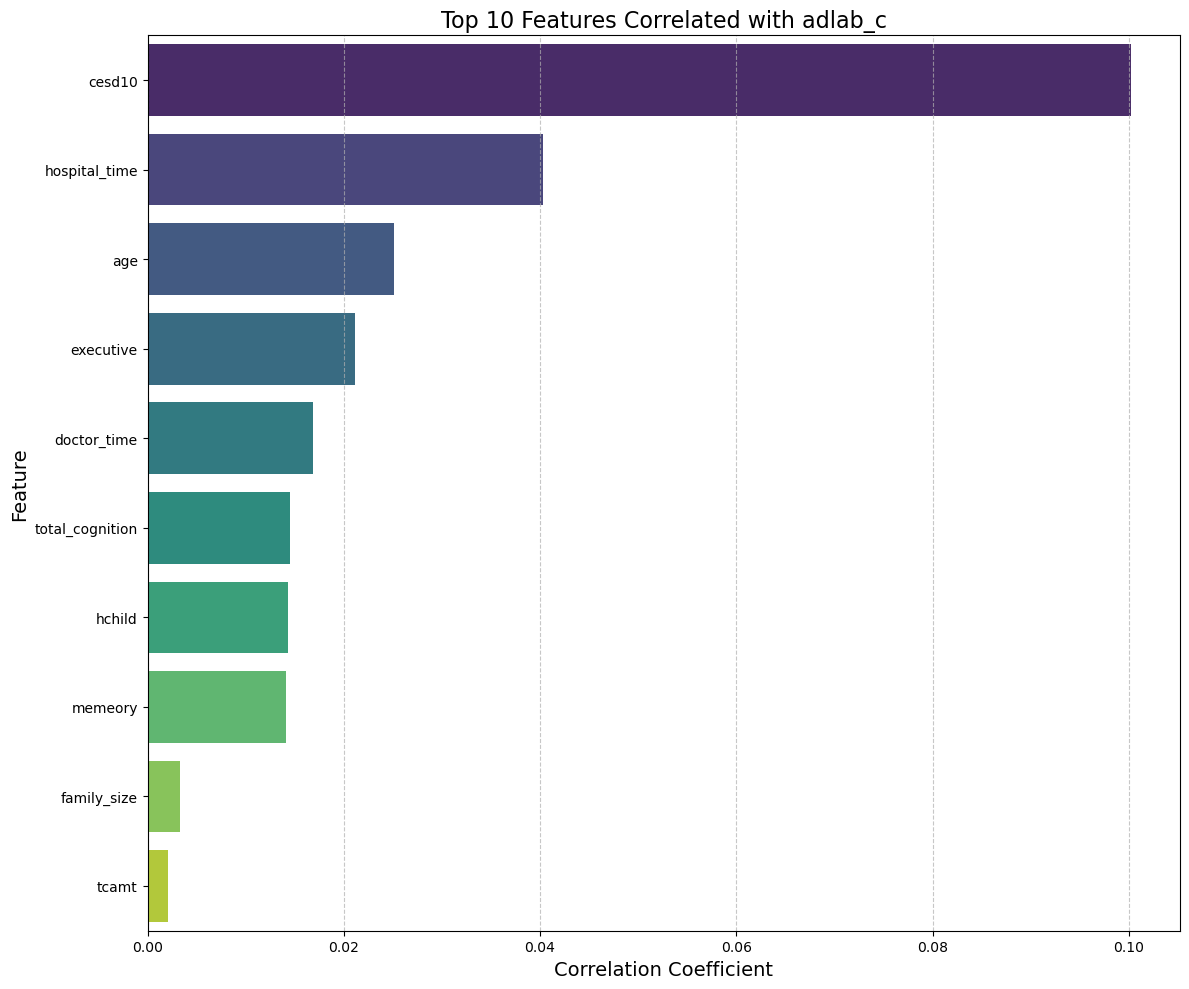

✅ 图表成功保存！
📁 文件名: feature_correlation_chart.png
📊 文件大小: 163.74 KB
📍 保存位置: 当前工作目录
💡 提示: 请在Jupyter的文件浏览器中查找并双击此文件


In [5]:
# 在文件开头添加这行魔术命令（仅Jupyter环境需要）
%matplotlib inline

TARGET_VARIABLE = 'adlab_c'
# 确保目标变量存在于数据中
if TARGET_VARIABLE not in df.columns:
    print(f"警告：目标变量 '{TARGET_VARIABLE}' 不存在于数据中！")

# 筛选出非目标变量作为特征
features = [col for col in df.columns if col != TARGET_VARIABLE]

# 创建结果存储列表
results = []

skipped_features = []  # 用于存储因期望频数过低等原因跳过的特征
#跑一遍之后发现有由于期望频数过低而跳过的特征，所以完善代码，加入这一行用来存储这些跳过的特征

# 遍历所有特征进行相关性分析
for feature in features:
    try:
        # 获取特征数据和目标变量数据（去除缺失值）
        valid_data = df[[feature, TARGET_VARIABLE]].dropna()
        
        # 如果有效样本量太少，跳过该特征
        if len(valid_data) < 10:
            print(f"特征 '{feature}' 的有效样本量不足，跳过分析。")
            continue
        
        # 获取特征类型
        feature_type = variable_types.get(feature, 'unknown')

# 检查目标变量类型（分类变量）
        target_type = 'categorical' if pd.api.types.is_object_dtype(df[TARGET_VARIABLE]) or df[TARGET_VARIABLE].nunique() <= 10 else 'continuous'
        
        # 根据特征类型和目标变量类型选择分析方法
        if feature_type == 'continuous' and target_type == 'continuous':
            # 连续型特征 vs 连续型目标变量：皮尔逊相关系数
            corr, p_value = stats.pearsonr(valid_data[feature], valid_data[TARGET_VARIABLE])
            method = 'Pearson相关'
            results.append({
                '特征': feature,
                '方法': method,
                '相关系数': corr,
                'p值': p_value,
                '特征类型': feature_type,
                '目标变量类型': target_type
            })
            
        elif feature_type == 'continuous' and target_type == 'categorical':
            # 连续型特征 vs 分类型目标变量：方差分析(ANOVA)或Kruskal-Wallis检验
            # 检查目标变量的唯一值数量，如果是二分类，也可以使用点二列相关
            if valid_data[TARGET_VARIABLE].nunique() == 2:
                # 二分类目标变量：点二列相关
                le = LabelEncoder()
                target_encoded = le.fit_transform(valid_data[TARGET_VARIABLE])
                corr, p_value = pointbiserialr(target_encoded, valid_data[feature])
                method = '点二列相关'
            else:
                # 多分类目标变量：首先检查方差齐性
                groups = [group[feature].values for name, group in valid_data.groupby(TARGET_VARIABLE)]
                _, levene_p = stats.levene(*groups)
                
                if levene_p > 0.05:
                    # 方差齐性：ANOVA
                    f_stat, p_value = stats.f_oneway(*groups)
                    # 计算效应量 eta-squared
                    eta_squared = f_stat * (len(groups) - 1) / (f_stat * (len(groups) - 1) + len(valid_data) - len(groups))
                    method = 'ANOVA (方差齐性)'
                    corr = eta_squared  # 使用eta-squared作为效应量
                else:
                    # 方差不齐：Kruskal-Wallis检验
                    h_stat, p_value = stats.kruskal(*groups)
                    # 计算效应量 epsilon-squared
                    epsilon_squared = (h_stat - len(groups) + 1) / (len(valid_data) - len(groups))
                    method = 'Kruskal-Wallis (方差不齐)'
                    corr = epsilon_squared  # 使用epsilon-squared作为效应量
            
            results.append({
                '特征': feature,
                '方法': method,
                '相关系数': corr,
                'p值': p_value,
                '特征类型': feature_type,
                '目标变量类型': target_type
            })
            
        elif feature_type == 'categorical' and target_type == 'categorical':
            # 分类型特征 vs 分类型目标变量：卡方检验
            contingency_table = pd.crosstab(valid_data[feature], valid_data[TARGET_VARIABLE])
            
            # 检查期望频数，如果有太多单元格期望频数小于5，使用Fisher精确检验
            expected_freq = stats.contingency.expected_freq(contingency_table)
            if (expected_freq < 5).sum() > contingency_table.size * 0.2:
                # 对于2x2的列联表，可以使用Fisher精确检验
                if contingency_table.shape == (2, 2):
                    odds_ratio, p_value = stats.fisher_exact(contingency_table)
                    method = 'Fisher精确检验'
                    # 对于Fisher精确检验，我们使用Cramer's V作为效应量
                    n = contingency_table.sum().sum()
                    min_dim = min(contingency_table.shape) - 1
                    chi2 = stats.chi2_contingency(contingency_table, correction=False)[0]
                    cramers_v = np.sqrt(chi2 / (n * min_dim))
                    corr = cramers_v
                else:
                    print(f"特征 '{feature}' 的列联表维度为{contingency_table.shape}，且期望频数过低，跳过分析。")
                    continue
            else:
                # 卡方检验
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
                method = '卡方检验'
                # 计算Cramer's V作为效应量
                n = contingency_table.sum().sum()
                min_dim = min(contingency_table.shape) - 1
                cramers_v = np.sqrt(chi2 / (n * min_dim))
                corr = cramers_v
            
            results.append({
                '特征': feature,
                '方法': method,
                '相关系数': corr,
                'p值': p_value,
                '特征类型': feature_type,
                '目标变量类型': target_type
            })
            
    except Exception as e:
            print(f"分析特征 '{feature}' 时出错: {str(e)}")
            continue

# 将结果转换为DataFrame并排序
results_df = pd.DataFrame(results)

# 计算显著性标记
def get_significance(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

results_df['显著性'] = results_df['p值'].apply(get_significance)

# 按相关系数绝对值排序
results_df = results_df.sort_values(by='相关系数', key=abs, ascending=False)

# 打印结果摘要
print("\n相关性分析结果摘要（按相关系数绝对值排序）：")
print(results_df[['特征', '方法', '相关系数', 'p值', '显著性']].head(20))


# 可视化前20个特征的相关系数
# 1. 移除所有中文字体设置，使用Matplotlib默认字体
# 不设置任何中文字体，完全使用英文
plt.rcParams['axes.unicode_minus'] = False  # 仅解决负号显示问题

try:
    # 2. 创建图表
    plt.figure(figsize=(12, 10))
    
    # 获取前20个特征
    top_n = min(20, len(results_df))
    top_features = results_df.head(top_n)
    
    # 3. 修复seaborn的palette警告问题
    # 使用hue参数和legend=False组合代替单独的palette参数
    sns.barplot(x='相关系数', y='特征', data=top_features, hue='特征', palette='viridis', legend=False)
    
    # 4. 所有标题和标签使用英文
    plt.title(f'Top {top_n} Features Correlated with {TARGET_VARIABLE}', fontsize=16)
    plt.xlabel('Correlation Coefficient', fontsize=14)  # 英文X轴标签
    plt.ylabel('Feature', fontsize=14)  # 英文Y轴标签
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # 5. 简化图片保存路径处理
    # 使用当前目录和简单文件名
    file_name = 'feature_correlation_chart.png'
    
    # 直接使用相对路径保存
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
  
    
    # 在Jupyter中直接显示图表
    plt.show()
    
       # 6. 验证文件是否真的保存成功
    if os.path.exists(file_name):
        file_size = os.path.getsize(file_name) / 1024  # KB
        print(f"✅ 图表成功保存！")
        print(f"📁 文件名: {file_name}")
        print(f"📊 文件大小: {file_size:.2f} KB")
        print(f"📍 保存位置: 当前工作目录")
        print(f"💡 提示: 请在Jupyter的文件浏览器中查找并双击此文件")
        
        # 在Jupyter中显示图表
        plt.show()
    else:
        print(f"❌ 警告：文件 {file_name} 似乎没有成功保存！")
        print("请检查您的Jupyter是否有写入权限")
    
except Exception as e:
    print(f"❌ 保存图表时出错: {str(e)}")
    print("请检查您的文件系统权限")
    
finally:
    # 确保释放所有图表资源
    plt.close('all')

In [14]:
#基于筛选出的重要特征，使用递归特征消除（RFE）移除不重要的特征，最终保留最优特征子集。

print("\n========= 第一阶段：基础特征子集构建 =========")

# 1. 选择相关系数绝对值大于0.1的特征
selected_features_corr = results_df[abs(results_df['相关系数']) > 0.1]['特征'].tolist()
print(f"\n基于相关系数筛选出的特征数量: {len(selected_features_corr)}")
print(f"特征列表: {selected_features_corr}")

# 2. 数据预处理（处理缺失值和分类变量）
def preprocess_data(df, features, target):
    # 创建数据副本
    data = df.copy()
    
    # 处理缺失值（对于数值型特征用中位数填充，分类型特征用众数填充）
    for col in features:
        if pd.api.types.is_numeric_dtype(data[col]):
            data[col].fillna(data[col].median(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)
    
    # 编码分类特征
    for col in features:
        if not pd.api.types.is_numeric_dtype(data[col]):
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    
    # 编码目标变量（如果需要）
    if not pd.api.types.is_numeric_dtype(data[target]):
        le_target = LabelEncoder()
        data[target] = le_target.fit_transform(data[target])
    
    return data

# 预处理数据
processed_df = preprocess_data(df, selected_features_corr, TARGET_VARIABLE)

# 准备特征矩阵和目标变量
X = processed_df[selected_features_corr]
Y = processed_df[TARGET_VARIABLE]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y if len(Y.unique()) > 1 else None)

# 3. 使用RFE进行特征选择
# 使用随机森林作为基础模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 初始化RFE，选择一半的特征
rfe = RFE(estimator=rf, n_features_to_select=max(2, len(selected_features_corr) // 2), step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# 获取RFE选择的特征
selected_features_rfe = [feature for feature, selected in zip(selected_features_corr, rfe.support_) if selected]
print(f"\nRFE选择的特征数量: {len(selected_features_rfe)}")
print(f"RFE选择的特征列表: {selected_features_rfe}")

# 4. 构建初步模型并评估
print("\n构建并评估初步模型:")

# 逻辑回归模型
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_rfe, y_train)
y_pred_lr = lr.predict(X_test_rfe)
y_pred_proba_lr = lr.predict_proba(X_test_rfe)[:, 1] if len(Y.unique()) > 1 else None

# 随机森林模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rfe, y_train)
y_pred_rf = rf.predict(X_test_rfe)
y_pred_proba_rf = rf.predict_proba(X_test_rfe)[:, 1] if len(Y.unique()) > 1 else None

# 评估模型性能
def evaluate_model(model_name, y_true, y_pred, y_pred_proba=None):
    print(f"\n{model_name} 模型评估:")
    print(f"准确率: {accuracy_score(y_true, y_pred):.4f}")
    
    if len(y_true.unique()) > 1:
        if y_pred_proba is not None:
            try:
                print(f"AUC值: {roc_auc_score(y_true, y_pred_proba):.4f}")
            except ValueError:
                print("无法计算AUC值（可能只有一个类别）")
        
    print("分类报告:")
    print(classification_report(y_true, y_pred))

# 评估两个模型
evaluate_model("逻辑回归", y_test, y_pred_lr, y_pred_proba_lr)
evaluate_model("随机森林", y_test, y_pred_rf, y_pred_proba_rf)

# 保存基准模型性能
baseline_performance = {
    'logistic_regression': accuracy_score(y_test, y_pred_lr),
    'random_forest': accuracy_score(y_test, y_pred_rf)
}




========= 第一阶段：基础特征子集构建 =========

基于相关系数筛选出的特征数量: 18
特征列表: ['iadl', 'disability', 'memrye', 'stroke', 'arthre', 'hospital', 'srh', 'satlife', 'chronic', 'pension', 'digeste', 'act_2', 'retire', 'hibpe', 'kidneye', 'drinkl', 'doctor', 'cesd10']


C:\Users\曹姿卿\AppData\Local\Temp\ipykernel_23948\3917878474.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [16]:
# -------------------------- 第二阶段：低频特征整合 --------------------------
print("\n========= 第二阶段：低频特征整合 =========")

# 1. 处理因期望频数过低而跳过的特征
print(f"\n需要处理的低频特征数量: {len(skipped_features)}")
print(f"低频特征列表: {skipped_features}")

# 低频特征处理函数
def process_low_frequency_features(df, low_freq_features):
    processed_features = []
    
    for feature in low_freq_features:
        try:
            # 检查特征是否存在于数据中
            if feature not in df.columns:
                continue
            
            # 获取特征类型
            if pd.api.types.is_numeric_dtype(df[feature]):
                # 数值型特征：保持不变或进行简单变换
                processed_features.append(feature)
            else:
                # 分类型特征：合并低频类别
                value_counts = df[feature].value_counts()
                # 找出低频类别（占比小于5%）
                threshold = len(df) * 0.05
                low_freq_categories = value_counts[value_counts < threshold].index
                
                # 为原特征创建副本并合并低频类别
                processed_feature = f"{feature}_processed"
                df[processed_feature] = df[feature].copy()
                df[processed_feature] = df[processed_feature].where(~df[processed_feature].isin(low_freq_categories), 'Other')
                
                # 如果处理后的特征只有一个类别，则不添加
                if df[processed_feature].nunique() > 1:
                    processed_features.append(processed_feature)
                    print(f"特征 '{feature}' 处理完成，合并了 {len(low_freq_categories)} 个低频类别")
            
        except Exception as e:
            print(f"处理特征 '{feature}' 时出错: {str(e)}")
            continue
    
    return processed_features

# 处理低频特征
processed_low_freq_features = process_low_frequency_features(df, skipped_features)
print(f"\n成功处理的低频特征数量: {len(processed_low_freq_features)}")

# 2. 将处理后的低频特征加入到基础特征子集中
if len(processed_low_freq_features) > 0:
    # 扩展特征集
    extended_features = selected_features_rfe + processed_low_freq_features
    
    # 预处理扩展后的特征集
    processed_df_extended = preprocess_data(df, extended_features, TARGET_VARIABLE)
    
    # 准备新的特征矩阵
    X_extended = processed_df_extended[extended_features]
    Y_extended = processed_df_extended[TARGET_VARIABLE]
    
    # 划分训练集和测试集
    X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
        X_extended, Y_extended, test_size=0.2, random_state=42, 
        stratify=Y_extended if len(Y_extended.unique()) > 1 else None
    )
    
    # 3. 对扩展后的特征集再次进行RFE选择
    rf_ext = RandomForestClassifier(n_estimators=100, random_state=42)
    rfe_ext = RFE(estimator=rf_ext, n_features_to_select=max(2, len(extended_features) // 2), step=1)
    X_train_rfe_ext = rfe_ext.fit_transform(X_train_ext, y_train_ext)
    X_test_rfe_ext = rfe_ext.transform(X_test_ext)
    
    # 获取最终选择的特征
    final_selected_features = [feature for feature, selected in zip(extended_features, rfe_ext.support_) if selected]
    print(f"\n扩展后RFE选择的特征数量: {len(final_selected_features)}")
    print(f"最终特征列表: {final_selected_features}")
    
    # 4. 构建新模型并与基准模型比较
    print("\n评估扩展特征集后的模型性能:")
    
    # 逻辑回归模型
    lr_ext = LogisticRegression(random_state=42, max_iter=1000)
    lr_ext.fit(X_train_rfe_ext, y_train_ext)
    y_pred_lr_ext = lr_ext.predict(X_test_rfe_ext)
    
    # 随机森林模型
    rf_ext = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_ext.fit(X_train_rfe_ext, y_train_ext)
    y_pred_rf_ext = rf_ext.predict(X_test_rfe_ext)
    
    # 评估扩展后的模型
    evaluate_model("扩展特征集-逻辑回归", y_test_ext, y_pred_lr_ext)
    evaluate_model("扩展特征集-随机森林", y_test_ext, y_pred_rf_ext)
    
    # 比较性能
    current_performance = {
        'logistic_regression': accuracy_score(y_test_ext, y_pred_lr_ext),
        'random_forest': accuracy_score(y_test_ext, y_pred_rf_ext)
    }
    
    print("\n模型性能比较:")
    for model in baseline_performance:
        improvement = current_performance[model] - baseline_performance[model]
        print(f"{model}: 基准准确率 {baseline_performance[model]:.4f}, 当前准确率 {current_performance[model]:.4f}, {'提升' if improvement > 0 else '下降'} {abs(improvement):.4f}")
    
    # 如果扩展特征集没有提升性能，则使用原始特征集
    if current_performance['random_forest'] <= baseline_performance['random_forest']:
        print("\n注意：扩展特征集并未提升模型性能，建议使用原始特征集进行后续分析。")
        final_selected_features = selected_features_rfe
        X_final_train, X_final_test, y_final_train, y_final_test = X_train_rfe, X_test_rfe, y_train, y_test
    else:
        print("\n扩展特征集成功提升了模型性能，将使用新的特征集进行后续分析。")
        X_final_train, X_final_test, y_final_train, y_final_test = X_train_rfe_ext, X_test_rfe_ext, y_train_ext, y_test_ext
else:
    print("\n没有成功处理的低频特征，将使用原始特征集进行后续分析。")
    final_selected_features = selected_features_rfe
    X_final_train, X_final_test, y_final_train, y_final_test = X_train_rfe, X_test_rfe, y_train, y_test

# -------------------------- 第三阶段：模型优化与最终确定 --------------------------
print("\n========= 第三阶段：模型优化与最终确定 =========")

# 1. 对最优特征子集进行模型调优
print("\n对随机森林模型进行网格搜索调优:")

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 初始化网格搜索
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 执行网格搜索
grid_search.fit(X_final_train, y_final_train)

# 获取最优参数和模型
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(f"\n最优参数: {best_params}")
print(f"交叉验证最佳准确率: {grid_search.best_score_:.4f}")

# 2. 在测试集上评估最优模型
y_pred_best = best_rf.predict(X_final_test)
print("\n最优模型在测试集上的性能:")
evaluate_model("最优随机森林", y_final_test, y_pred_best)

# 3. 特征重要性分析
feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': final_selected_features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n特征重要性排序:")
print(feature_importance_df)

# 可视化特征重要性
try:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Feature Importance from Random Forest', fontsize=16)
    plt.xlabel('Importance Score', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    importance_file_name = 'feature_importance_chart.png'
    plt.savefig(importance_file_name, dpi=300, bbox_inches='tight')
    plt.show()
    
    if os.path.exists(importance_file_name):
        print(f"✅ 特征重要性图表成功保存为: {importance_file_name}")
    
except Exception as e:
    print(f"❌ 保存特征重要性图表时出错: {str(e)}")
finally:
    plt.close('all')

# 4. 最终结论
print("\n========= 特征选择与模型构建总结 =========")
print(f"1. 通过相关性分析筛选出 {len(selected_features_corr)} 个相关系数大于0.1的特征")
print(f"2. 通过RFE进一步筛选出 {len(selected_features_rfe)} 个核心特征")
print(f"3. 处理了 {len(processed_low_freq_features)} 个低频特征")
print(f"4. 最终选择了 {len(final_selected_features)} 个特征用于构建模型")
print(f"5. 经过网格搜索调优，最优随机森林模型的测试集准确率为: {accuracy_score(y_final_test, y_pred_best):.4f}")
print(f"\n建议使用的最终特征列表:")
for i, feature in enumerate(final_selected_features, 1):
    print(f"{i}. {feature}")

print("\n特征选择和模型构建过程已完成！")


========= 第二阶段：低频特征整合 =========

需要处理的低频特征数量: 0
低频特征列表: []

成功处理的低频特征数量: 0

没有成功处理的低频特征，将使用原始特征集进行后续分析。


NameError: name 'selected_features_rfe' is not defined